<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

pd.set_option('display.expand_frame_repr', False)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [2]:
# Load the data
house = pd.read_csv('./housing.csv')

In [3]:
# A:
house.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [4]:
house.head(20)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice
0    1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    ...            0    NaN    NaN         NaN       0      2   2008        WD         Normal     208500
1    2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub    ...            0    NaN    NaN         NaN       0      5   2007        WD         Normal     181500
2    3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    ...            0    NaN    NaN         NaN       0      9   2008        WD         Normal     223500
3    4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    ...            0    NaN    NaN         NaN       0      2   2006        WD        Abnorml     140000
4    5          60       RL         84.0    14260   Pave   NaN      IR1         Lvl    AllPub    ...            0    NaN    NaN         NaN       0     12   2008        WD         Normal     250000
5    6          50       RL         85.0    14115   Pave   NaN      IR1         Lvl    AllPub    ...            0    NaN  MnPrv        Shed     700     10   2009        WD         Normal     143000
6    7          20       RL         75.0    10084   Pave   NaN      Reg         Lvl    AllPub    ...            0    NaN    NaN         NaN       0      8   2007        WD         Normal     307000
7    8          60       RL          NaN    10382   Pave   NaN      IR1         Lvl    AllPub    ...            0    NaN    NaN        Shed     350     11   2009        WD         Normal     200000
8    9          50       RM         51.0     6120   Pave   NaN      Reg         Lvl    AllPub    ...            0    NaN    NaN         NaN       0      4   2008        WD        Abnorml     129900
9   10         190       RL         50.0     7420   Pave   NaN      Reg         Lvl    AllPub    ...            0    NaN    NaN         NaN       0      1   2008        WD         Normal     118000
10  11          20       RL         70.0    11200   Pave   NaN      Reg         Lvl    AllPub    ...            0    NaN    NaN         NaN       0      2   2008        WD         Normal     129500
11  12          60       RL         85.0    11924   Pave   NaN      IR1         Lvl    AllPub    ...            0    NaN    NaN         NaN       0      7   2006       New        Partial     345000
12  13          20       RL          NaN    12968   Pave   NaN      IR2         Lvl    AllPub    ...            0    NaN    NaN         NaN       0      9   2008        WD         Normal     144000
13  14          20       RL         91.0    10652   Pave   NaN      IR1         Lvl    AllPub    ...            0    NaN    NaN         NaN       0      8   2007       New        Partial     279500
14  15          20       RL          NaN    10920   Pave   NaN      IR1         Lvl    AllPub    ...            0    NaN   GdWo         NaN       0      5   2008        WD         Normal     157000
15  16          45       RM         51.0     6120   Pave   NaN      Reg         Lvl    AllPub    ...            0    NaN  GdPrv         NaN       0      7   2007        WD         Normal     132000
16  17          20       RL          NaN    11241   Pave   NaN      IR1         Lvl    AllPub    ...            0    NaN    NaN        Shed     700      3   2010        WD         Normal     149000
17  18          90       RL         72.0    10791   Pave   NaN      Reg         Lvl    AllPub    ...            0    NaN    NaN        Shed     500     10   2006        WD         Normal      90000
18  19          20       RL         66.0    13695   Pave   NaN      Reg         Lvl    AllPub    ...            0    NaN    NaN         NaN       0      6   2008        WD         Normal     159000
19  20          20       RL         70.0    

In [128]:
house.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold  SalePrice  subclass_code  neighbourhood_code  zoning_code  alley_code  lotshape_code  contour_code  utilities_code  lotconfig_code  slope_code  bldtype_code  grgtype_code  street_code
Id                  1.000000    0.015291    -0.019560 -0.034304    -0.030440     0.010907  -0.017656     -0.021695   -0.052487   -0.003892   -0.006585  -0.008856    -0.015394  0.010273  0.007620     -0.034908   0.010786      0.000026     -0.016459  0.005969  0.005817      0.040531      0.007294      0.028958   -0.020246    0.011243    0.011743   -0.031547     0.002112       0.007034  -0.047043     0.002628  0.057108 -0.007071  0.025820  -0.024353       0.022377           -0.013529    -0.017422    0.001910       0.031627     -0.018400        0.013318        0.046188    0.006133      0.022024     -0.004398     0.023977
MSSubClass          0.015291    1.000000    -0.215415 -0.139725     0.028891    -0.063504   0.030056      0.035989    0.023617   -0.074762   -0.065991  -0.139862    -0.242933 -0.256336  0.304606      0.049734   0.069245      0.004554     -0.011513  0.127755  0.178640     -0.030009      0.274877      0.034751   -0.049409   -0.042209   -0.100045   -0.012677    -0.002789      -0.011016  -0.044032    -0.030057  0.008308 -0.007172 -0.015808  -0.087487       0.966388           -0.008981     0.038535    0.100584       0.119960     -0.006603       -0.022946        0.081663   -0.023106      0.747833      0.134003    -0.050536
LotFrontage        -0.019560   -0.215415     1.000000  0.100273     0.183681    -0.049826   0.041029      0.081961    0.106697    0.079165   -0.008637   0.159562     0.239862  0.247524  0.044531      0.042045   0.223062      0.012828     -0.027684  0.123610 -0.011265      0.147850      0.035006      0.223205    0.046450    0.166719    0.201015   -0.015127     0.072127       0.025923   0.023823     0.023599  0.114483 -0.060943  0.017440   0.214273      -0.195098            0.070846    -0.043387   -0.045341       0.164458     -0.065394       -0.043552        0.030206   -0.043009     -0.238721     -0.087859    -0.004107
LotArea            -0.034304   -0.139725     0.100273  1.000000     0.106457    -0.006074   0.012958      0.013475    0.103071    0.214794    0.111037  -0.003035     0.261034  0.299984  0.051568      0.006429   0.264359      0.158232      0.049121  0.126324  0.013691      0.120122     -0.017014      0.190489    0.271941    0.154124    0.179251    0.171632     0.087333      -0.016954   0.020349     0.043435  0.077652  0.037468  0.001500   0.264715      -0.132351            0.044559    -0.041238   -0.028938      -0.165542     -0.150298        0.010108       -0.122102    0.442975     -0.206012     -0.150213    -0.233858
OverallQual        -0.030440    0.028891     0.183681  0.106457     1.000000    -0.107874   0.567392      0.544850    0.405799    0.235139   -0.062980   0.313101     0.536622  0.472004  0.295153     -0.016250   0.591722      0.107451     -0.043259  0.544777  0.270713      0.091649     -0.189207      0.426924    0.391760    0.602533    0.570620    0.234394     0.320894      -0.104417   0.029411     0.062759  0.065112 -0.030910  0.078088   0.789031       0.053120            0.193021    -0.234375    0.128373      -0.188012      0.023852       -0.002191       -0.028803   -0.060715      0.045884     -0.419214     0.033130
OverallCond         0.010907   -0.063504    -0.049826 -0.006074    -0.107874     1.000000  -0.390446      0.067475   -0.130376   -0.053095    0.038818  -0.135607    -0.177514 -0.152497  0.025345      0.050366  -0.086680     -0.057456      0.116901 -0.206639 -0.066594      0.0

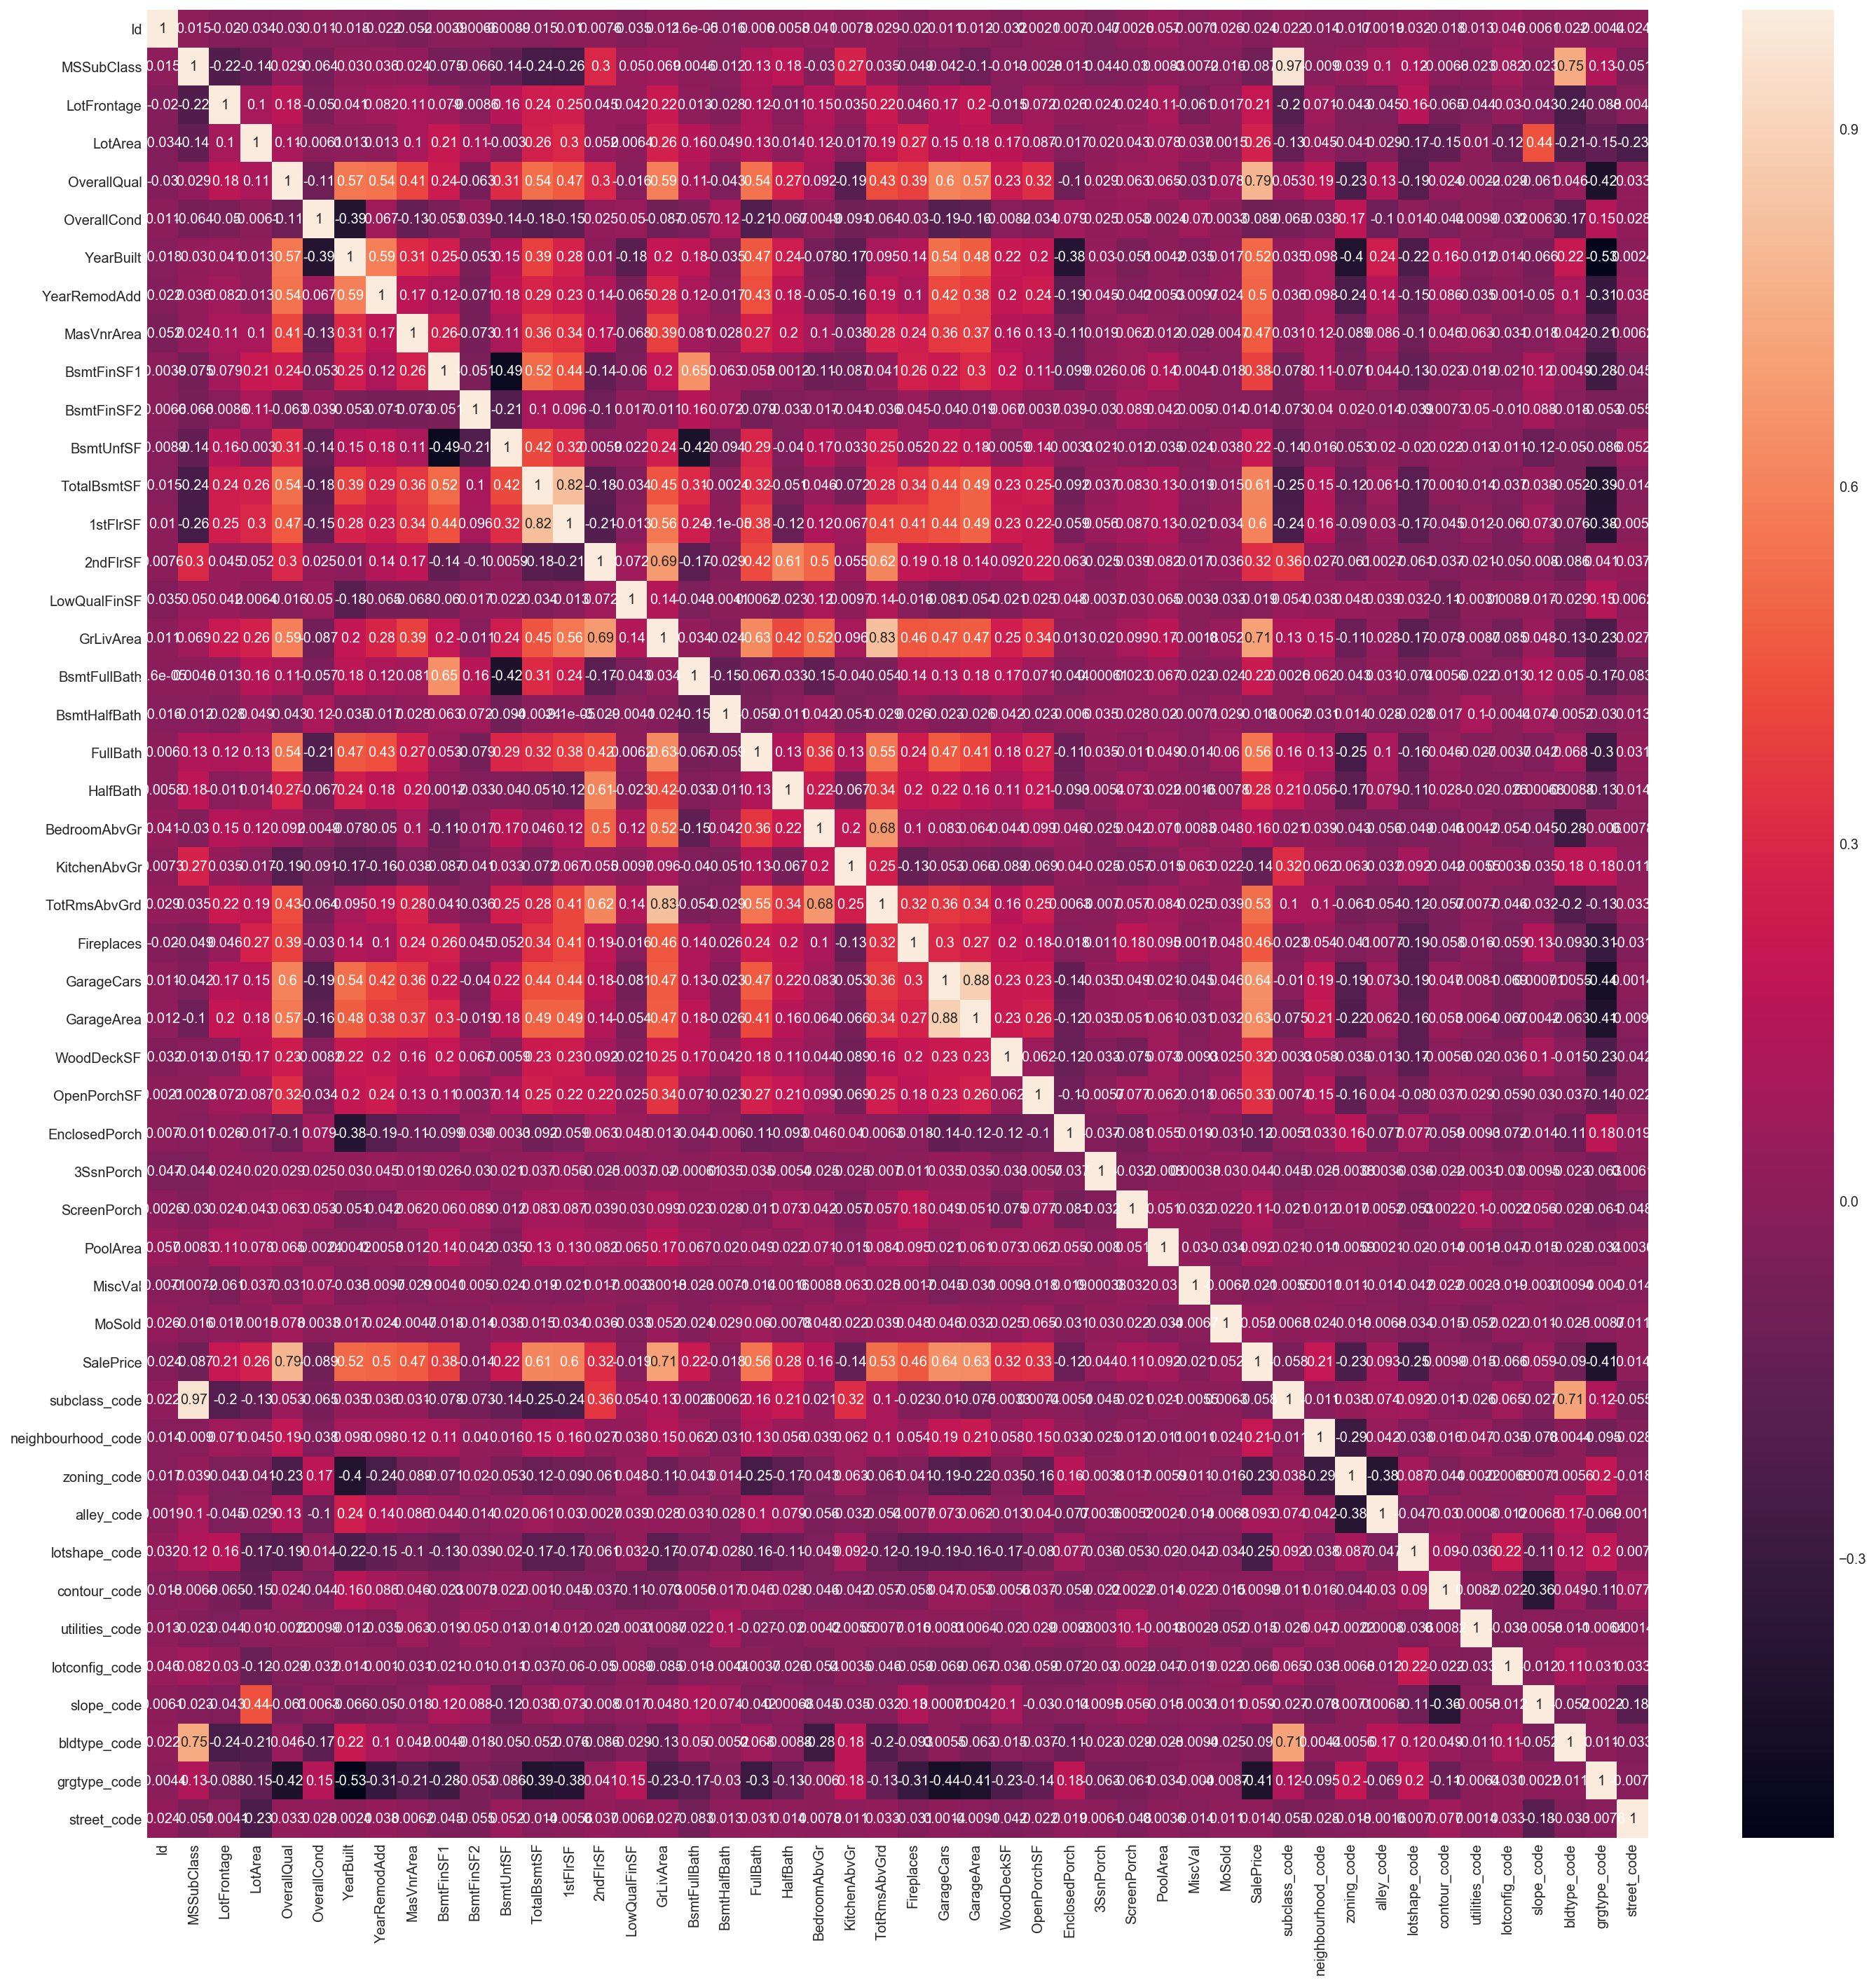

In [205]:
plt.figure(figsize=(24,24))
sns.heatmap(house.corr(), annot=True)

In [75]:
house_new = pd.concat([house, dummy_df], axis=1)
house_new
'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GRLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation     BsmtQual     BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces   FireplaceQu GarageType GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   PoolQC     Fence MiscFeature  MiscVal  MoSold YrSold SaleType SaleCondition  SalePrice BsmtFinTYpe1 BsmtFinTYpe2  20  30  40  45  50  60  70  75  80  85  90  120  160  180  190
0        1          60       RL         65.0     8450   Pave  None      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc           Gd           TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0  No Fireplace     Attchd        2003          RFn           2         548         TA         TA          Y           0           61              0          0            0         0  No Pool  No Fence        None        0       2   2008       WD        Normal     208500          GLQ          Unf   0   0   0   0   0   1   0   0   0   0   0    0    0    0    0
1        2          20       RL         80.0     9600   Pave  None      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock           Gd           TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1            TA     Attchd        1976          RFn           2         460         TA         TA          Y         298            0              0          0            0         0  No Pool  No Fence        None        0       5   2007       WD        Normal     181500          ALQ          Unf   1   0   0   0   0   0   0   0   0   0   0    0    0    0    0
2        3          60       RL         68.0    11250   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc           Gd           TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1            TA     Attchd        2001          RFn           2         608         TA         TA          Y           0           42              0          0            0         0  No Pool  No Fence        None        0       9   2008       WD        Normal     223500          GLQ          Unf   0   0   0   0   0   1   0   0   0   0   0    0    0   

In [6]:
from sklearn.preprocessing import LabelEncoder

ms_subclass = LabelEncoder()
house["neighborhood_code"] = ms_subclass.fit_transform(house["Neighborhood"])
house[["Neighborhood", "neighborhood_code"]].head(50)

Neighborhood  neighborhood_code
0       CollgCr                  5
1       Veenker                 24
2       CollgCr                  5
3       Crawfor                  6
4       NoRidge                 15
5       Mitchel                 11
6       Somerst                 21
7        NWAmes                 14
8       OldTown                 17
9       BrkSide                  3
10       Sawyer                 19
11      NridgHt                 16
12       Sawyer                 19
13      CollgCr                  5
14        NAmes                 12
15      BrkSide                  3
16        NAmes                 12
17       Sawyer                 19
18      SawyerW                 20
19        NAmes                 12
20      NridgHt                 16
21       IDOTRR                  9
22      CollgCr                  5
23      MeadowV                 10
24       Sawyer                 19
25      NridgHt                 16
26        NAmes                 12
27      NridgHt                 16
28        NAmes                 12
29      BrkSide                  3
30       IDOTRR                  9
31       Sawyer                 19
32      CollgCr                  5
33        NAmes                 12
34      NridgHt                 16
35      NridgHt                 16
36      CollgCr                  5
37        NAmes                 12
38        NAmes                 12
39      Edwards                  7
40        NAmes                 12
41       Timber                 23
42      SawyerW                 20
43      CollgCr                  5
44        NAmes                 12
45      NridgHt                 16
46      Mitchel                 11
47      Somerst                 21
48      OldTown                 17
49       Sawyer                 19

In [214]:
house.dtypes

Id                      int64
MSSubClass              int64
MSZoning               object
LotFrontage           float64
LotArea                 int64
Street                 object
Alley                  object
LotShape               object
LandContour            object
Utilities              object
LotConfig              object
LandSlope              object
Neighborhood           object
Condition1             object
Condition2             object
BldgType               object
HouseStyle             object
OverallQual             int64
OverallCond             int64
YearBuilt               int64
YearRemodAdd            int64
RoofStyle              object
RoofMatl               object
Exterior1st            object
Exterior2nd            object
MasVnrType             object
MasVnrArea            float64
ExterQual              object
ExterCond              object
Foundation             object
BsmtQual               object
BsmtCond               object
BsmtExposure           object
BsmtFinTyp

In [7]:
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1      ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000      ...        1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726      ...          94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091      ...         125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000      ...           0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000      ...           0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000      ...           0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000      ...         168.000000    68.000000       0.000000     0.000000     0.000000     0.000000      0.000000     8.000000  2009.000000  214000.000000
max    1460.000000   190.000000   313.000000  215245.000000    10.000000     9.000000  2010.000000   2010.000000  1600.000000  5644.000000      ...         857.000000   547.000000     552.000000   508.000000   480.000000   738.000000  15500.000000    12.000000  2010.000000  755000.000000

[8 rows x 38 columns]

In [206]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [9]:
house.shape

(1460, 81)

In [41]:
house.MSZoning.value_counts()
#10 non-residential values (commercial)

RL    1151
RM     218
FV      65
RH      16
Name: MSZoning, dtype: int64

In [13]:
house = house[house.MSZoning != "C (all)"]
house.MSZoning.value_counts()
# Drop rows where property is non-residential

RL    1151
RM     218
FV      65
RH      16
Name: MSZoning, dtype: int64

Text(0.5,1,'Sale Price vs Lot Area')

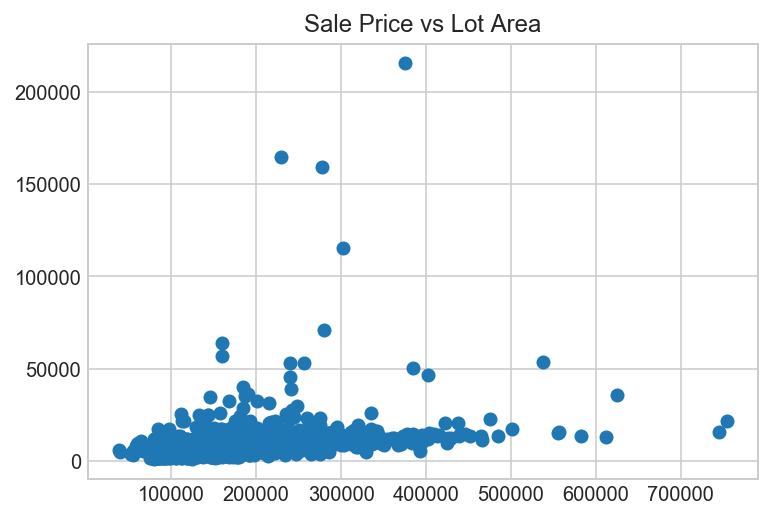

In [100]:
plt.scatter(house.SalePrice, house.LotArea)
plt.title("Sale Price vs Lot Area")

Text(0.5,1,'Sale Price vs Neighbourhood')

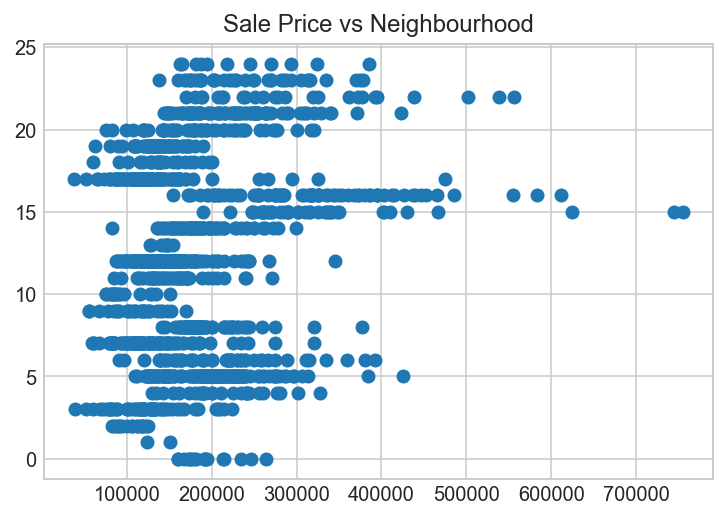

In [101]:
plt.scatter(house.SalePrice, house.neighbourhood_code)
plt.title("Sale Price vs Neighbourhood")

Text(0.5,1,'Sale Price vs Year Built')

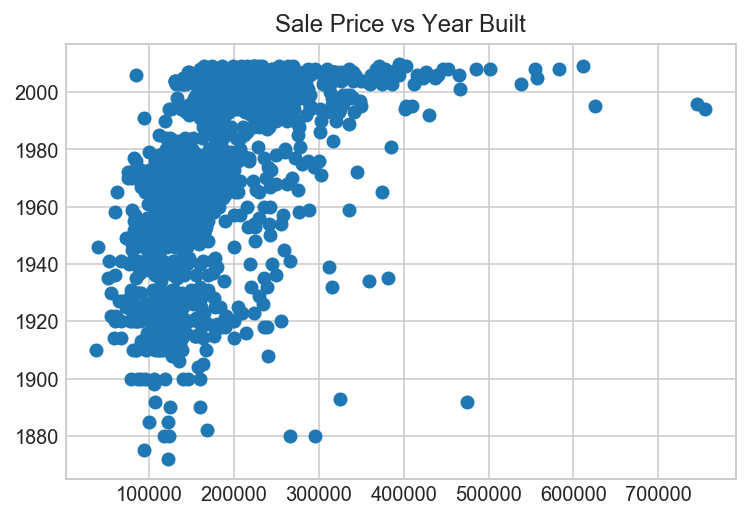

In [102]:
plt.scatter(house.SalePrice, house.YearBuilt)
plt.title("Sale Price vs Year Built")

In [56]:
house.loc[house['MasVnrArea'] == ]
#Investigate one entry with no sewer access

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
944  945          20       RL          NaN    14375   Pave   NaN      IR1         Lvl    NoSeWa   CulDSac       Gtl       Timber       Norm       Norm     1Fam       SLvl            6            6       1958          1958     Gable  CompShg     HdBoard     HdBoard    BrkFace       541.0        TA        TA     CBlock       TA       TA           No          GLQ         111          Rec         354        354          819    GasA        Gd          Y      FuseA      1344         0             0       1344             0             1         1         0             3             1          Gd             7        Typ           1          Gd    Basment       1958.0          RFn           2         525         TA         TA          Y           0          118              0          0          233         0    NaN   NaN         NaN        0       1    2009      COD       Abnorml     137500

In [208]:
house.YrSold = house.YrSold.astype(int)


In [44]:
house['BsmtFinType2']=house['BsmtFinType2'].fillna("No Basement")

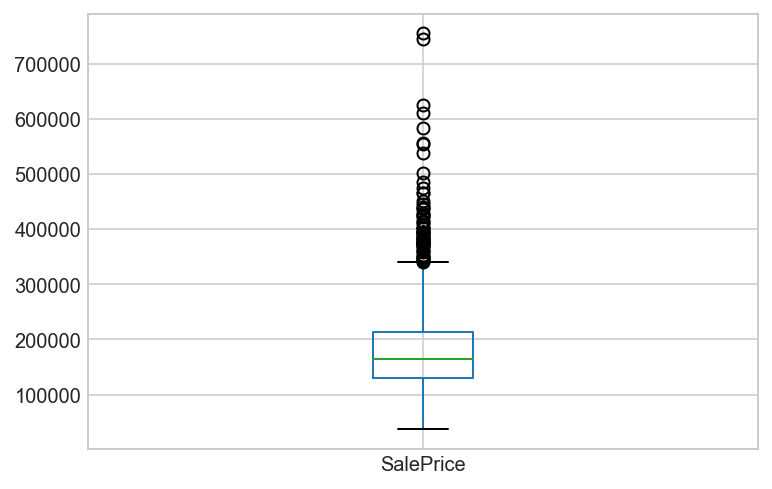

In [230]:
house.boxplot(column=['SalePrice'])

In [40]:
#simple linear regression for predicting house prices based on square feet
# target
price = house.SalePrice.values
# predictor
sqft = house.LotArea.values

In [39]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



In [46]:
def calculate_yhat(x, b0, b1):
    return b0 + b1*x
#write function to calculate predicted values

In [47]:
def plot_regression(x, y, b0, b1):
    
    fig = plt.figure(figsize=(7,7))
    ax = fig.gca()
    
    yhat = calculate_yhat(x, b0, b1)
    # y-true
    ax.scatter(x, y, color='steelblue', s=70)
    # y-pred
    ax.scatter(x, yhat, color='darkred', s=70, alpha=0.3)
    
    min_x, max_x = np.min(x), np.max(x)
    min_yhat = calculate_yhat(min_x, b0, b1)
    max_yhat = calculate_yhat(max_x, b0, b1)
    
    
    ax.plot([min_x, max_x], [min_yhat, max_yhat], color='darkred',
            linewidth=2.0, alpha=0.7)
    
    plt.show()
#define function to plot linear regression of the values

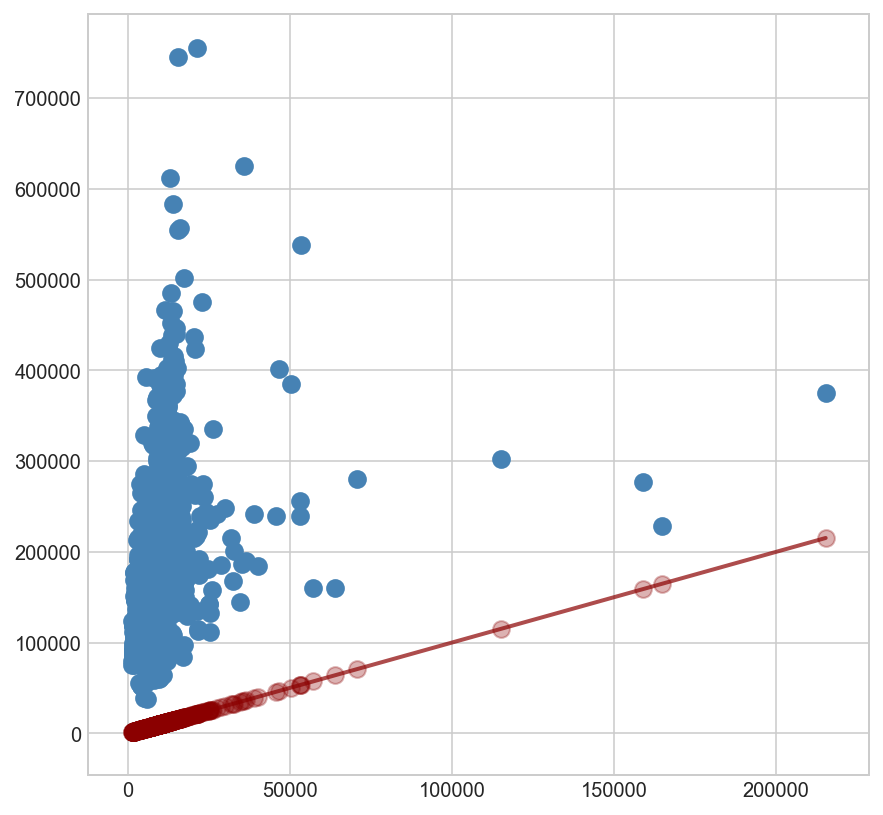

In [51]:
b0 = 0
b1 = 1
plot_regression(sqft, price, b0, b1)

In [48]:
def calculate_residuals(y, yhat):
    return y - yhat
#write function to calculate residual errors

In [49]:
def sum_sq_errors(errors):
    return np.sum(errors**2)
#write function to calculate sum of squared errors

In [52]:
price_hat = calculate_yhat(sqft, b0, b1)
residuals = calculate_residuals(price, price_hat)
sse = sum_sq_errors(residuals)
print (sse)

51085267200110


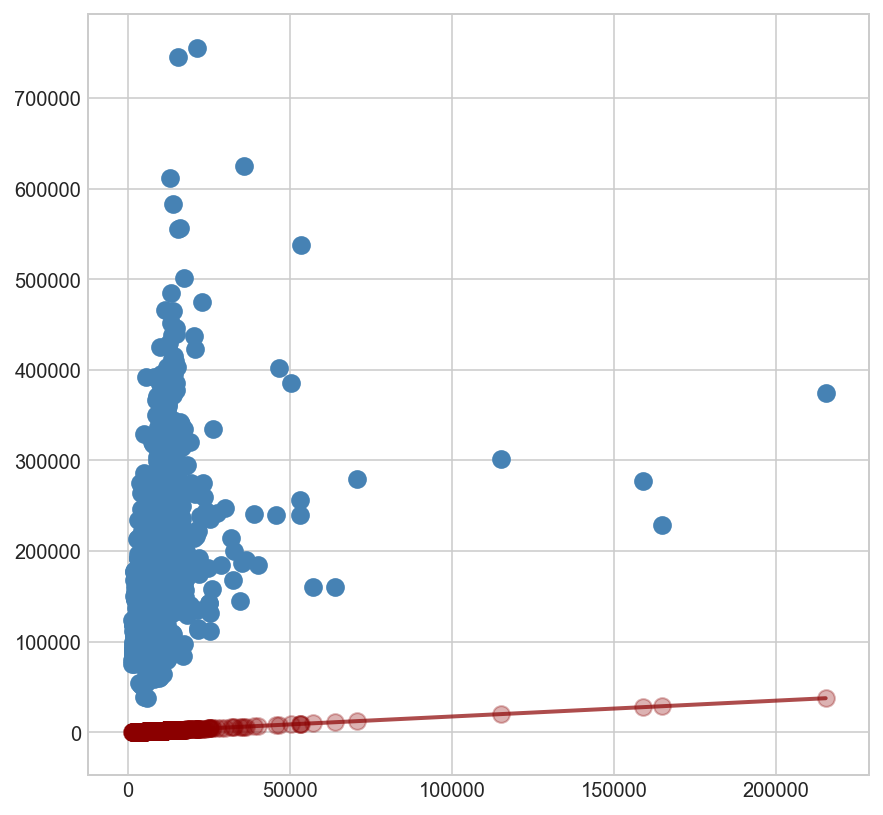

5.58642615909e+13


In [53]:
db0 = 100
b1 = 0.175

plot_regression(sqft, price, b0, b1)

price_hat = calculate_yhat(sqft, b0, b1)
residuals = calculate_residuals(price, price_hat)
sse = sum_sq_errors(residuals)
print (sse)

In [55]:
def calc_beta_one(x, y):
    mean_y = np.mean(y)
    mean_x = np.mean(x)
    
    numerator = np.sum((y - mean_y)*(x - mean_x))
    denominator = np.sum((x - mean_x)**2)
    
    return numerator/denominator

    
def calc_beta_zero(x, y, b1):
    
    mean_y = np.mean(y)
    mean_x = np.mean(x)
    
    return mean_y - b1*mean_x

b1 = calc_beta_one(sqft, price)
b0 = calc_beta_zero(sqft, price, b1)
print (b1, b0)
#function to calculate the optimal beta0 and beta1

2.0933690062 159624.678911


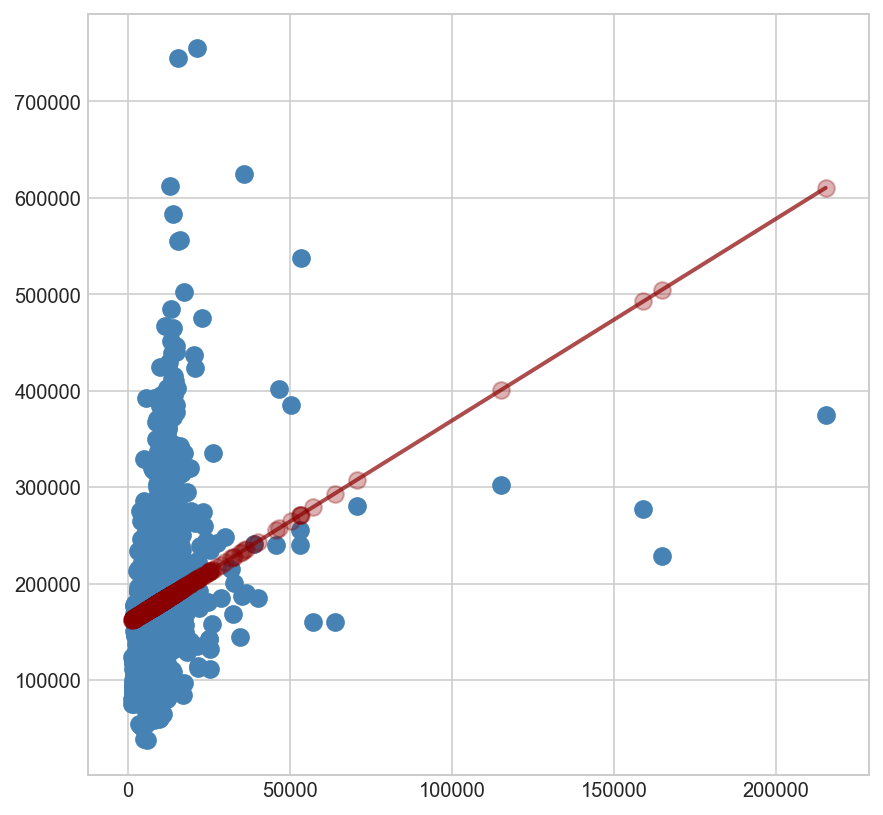

8.44713070127e+12


In [56]:
plot_regression(sqft, price, b0, b1)

price_hat = calculate_yhat(sqft, b0, b1)
residuals = calculate_residuals(price, price_hat)
sse = sum_sq_errors(residuals)
print (sse)
#apply optimal b0 and b1 to the model

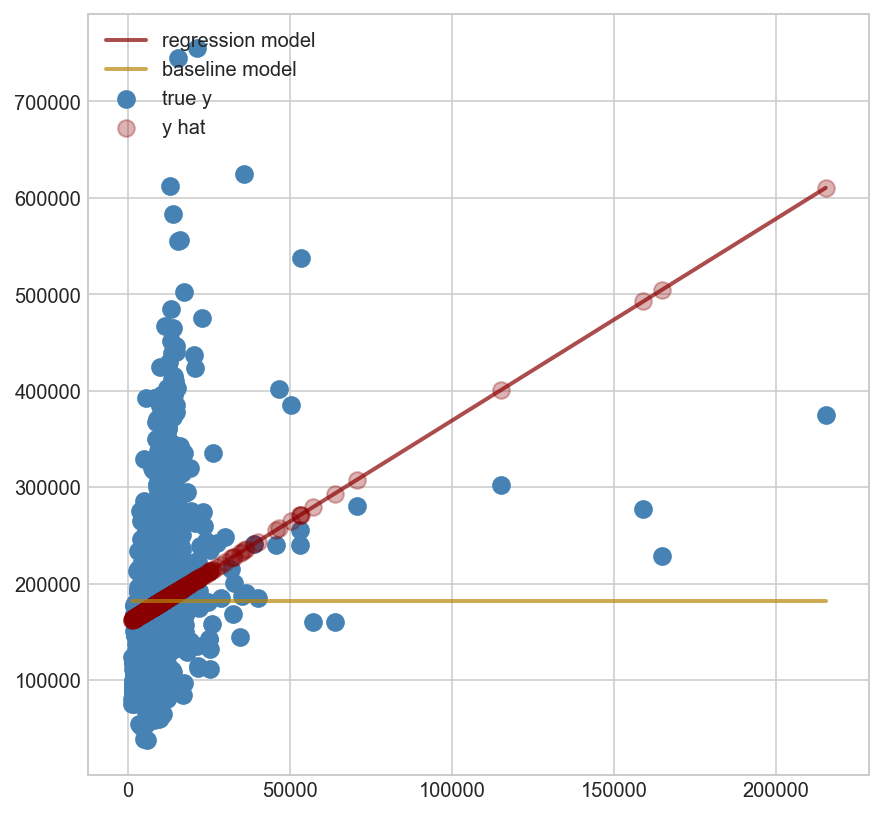

In [57]:
def estimate_betas(x, y):
    b1 = calc_beta_one(x, y)
    b0 = calc_beta_zero(x, y, b1)
    return b0, b1

def plot_regression_wbaseline(x, y, b0, b1):
    
    fig = plt.figure(figsize=(7,7))
    ax = fig.gca()
    
    yhat = calculate_yhat(x, b0, b1)
    ymean = np.mean(y)
    
    ax.scatter(x, y, color='steelblue', s=70, label='true y')
    
    ax.scatter(x, yhat, color='darkred', s=70, alpha=0.3, label='y hat')
    
    min_x, max_x = np.min(x), np.max(x)
    min_yhat = calculate_yhat(min_x, b0, b1)
    max_yhat = calculate_yhat(max_x, b0, b1)
    
    ax.plot([min_x, max_x], [min_yhat, max_yhat], color='darkred',
            linewidth=2.0, alpha=0.7, label='regression model')
    
    ax.plot([min_x, max_x], [ymean, ymean], color='darkgoldenrod',
            linewidth=2.0, alpha=0.7, label='baseline model')
    
    plt.legend(loc='upper left')
    
    plt.show()

b0, b1 = estimate_betas(sqft, price)
plot_regression_wbaseline(sqft, price, b0, b1)
#plot regression model against the baseline model (mean)

In [58]:
def calculate_sse(x, y, b0, b1):
    yhat = calculate_yhat(x, b0, b1)
    residuals = calculate_residuals(y, yhat)
    sse = sum_sq_errors(residuals)
    return sse

print ('Regression SSE:', calculate_sse(sqft, price, b0, b1))
print ('Baseline SSE:', calculate_sse(sqft, price, np.mean(price), 0))
#print Sum Square of Errors of model against the baseline

Regression SSE: 8.44713070127e+12
Baseline SSE: 9.08365901618e+12


In [59]:
def calculate_r2(y, yhat):
    # estimated error 
    err_tot = (y-np.mean(y))**2
    # residual error
    err_res = (y - yhat)**2
    # total sum of squares
    ss_tot = np.sum(err_tot)
    # residual sum of squares
    ss_res = np.sum(err_res)
    return 1 - (ss_res/ss_tot)

yhat = calculate_yhat(sqft, b0, b1)
print ('Regression Rsquared:', calculate_r2(price, yhat))
print ('Baseline Rsquared:', calculate_r2(price, np.mean(price)))
#Regression R**2 is beter tha the baseline, but still terrible. I will now try a Multiple Linear Regression

Regression Rsquared: 0.0700739992303
Baseline Rsquared: 0.0


In [187]:
#Create a new dataframe with the target variables
design_matrix = house[['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF','1stFlrSF', 'TotRmsAbvGrd','GrLivArea', 'FullBath', 'GarageCars', 'GarageArea']]
design_matrix['intercept'] = 1.
# reordering columns:
design_matrix = design_matrix[['intercept', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF','1stFlrSF', 'TotRmsAbvGrd','GrLivArea', 'FullBath', 'GarageCars', 'GarageArea']].values
print (design_matrix[0:8, :])



[[  1.00000000e+00   2.00300000e+03   2.00300000e+03   8.56000000e+02
    8.56000000e+02   8.00000000e+00   1.71000000e+03   2.00000000e+00
    2.00000000e+00   5.48000000e+02]
 [  1.00000000e+00   1.97600000e+03   1.97600000e+03   1.26200000e+03
    1.26200000e+03   6.00000000e+00   1.26200000e+03   2.00000000e+00
    2.00000000e+00   4.60000000e+02]
 [  1.00000000e+00   2.00100000e+03   2.00200000e+03   9.20000000e+02
    9.20000000e+02   6.00000000e+00   1.78600000e+03   2.00000000e+00
    2.00000000e+00   6.08000000e+02]
 [  1.00000000e+00   1.91500000e+03   1.97000000e+03   7.56000000e+02
    9.61000000e+02   7.00000000e+00   1.71700000e+03   1.00000000e+00
    3.00000000e+00   6.42000000e+02]
 [  1.00000000e+00   2.00000000e+03   2.00000000e+03   1.14500000e+03
    1.14500000e+03   9.00000000e+00   2.19800000e+03   2.00000000e+00
    3.00000000e+00   8.36000000e+02]
 [  1.00000000e+00   1.99300000e+03   1.99500000e+03   7.96000000e+02
    7.96000000e+02   5.00000000e+00   1.36200

/Users/ryanflannery/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [188]:
beta_vec = np.dot(np.dot(np.linalg.inv(np.dot(design_matrix.T, design_matrix)), design_matrix.T), price)
print (beta_vec)
#find the beta coefficients for the design matrix

[ -1.95597184e+06   4.47019464e+02   5.44704105e+02   3.57414814e+01
   4.74784787e+00  -1.10903215e+03   7.24216285e+01  -5.13904508e+03
   1.72142631e+04   1.38045046e+01]


In [189]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(fit_intercept=False)
linreg.fit(design_matrix, price)

print (linreg.coef_)
#check that the beta coefficients are the same as SKLearn

[ -1.95597184e+06   4.47019464e+02   5.44704105e+02   3.57414814e+01
   4.74784787e+00  -1.10903215e+03   7.24216285e+01  -5.13904508e+03
   1.72142631e+04   1.38045046e+01]


In [190]:
yhat = np.dot(design_matrix, beta_vec)
print ('MLR R^2:', calculate_r2(price, yhat))
#Rsquared for LotFrontage, MSSubClass, YrBuilt & TotRmsAbvGrd is 52.22
#Rsquared for 'neighbourhood_code', 'zoning_code', 'alley_code', 'lotshape_code', 'contour_code', 'utilities_code', 'lotconfig_code', 'slope_code', 'bldtype_code', 'grgtype_code', 'street_code' is 56.15'

MLR R^2: 0.729733456789


In [191]:
labels = house['SalePrice']
train1 = design_matrix

In [192]:
from sklearn.cross_validation import train_test_split

In [193]:
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size=0.1, random_state=2)

In [194]:
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [195]:
linreg.score(x_test, y_test)

0.68825451303274932

In [196]:
from sklearn import ensemble
clf = ensemble. GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split=2, learning_rate=0.1, loss='ls')

In [197]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

Text(0.5,1,'Sale Price vs Living Area')

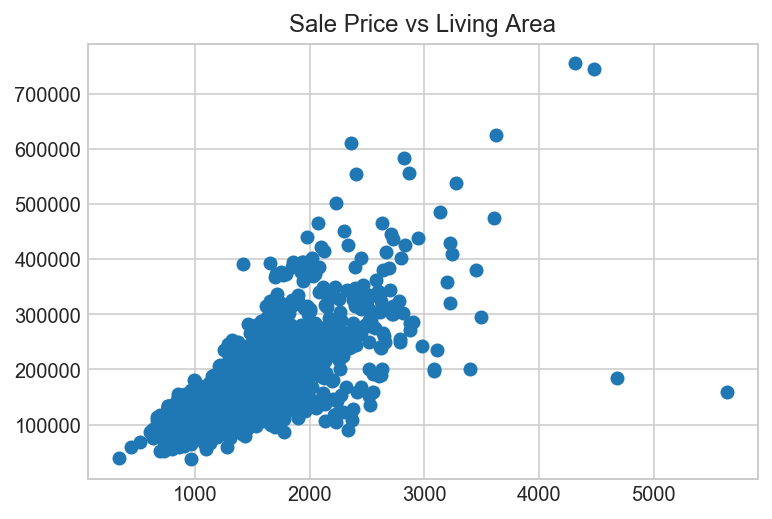

In [228]:
plt.scatter(house.GrLivArea, house.SalePrice)
plt.title("Sale Price vs Living Area")

In [160]:
# The biggest fixed indicators of sale price are 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GRLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea
# This allows for an accuracy of 81.67%

In [215]:
# Create dataset 1
pre2010_features = house[house.YrSold < 2010]
pre2010_target = house[house.YrSold < 2010]

# Create dataset 2
features_2010 = house[house.YrSold == 2010]
target_2010 = house[house.YrSold == 2010]


In [216]:
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]


In [217]:
from sklearn.grid_search import GridSearchCV
from sklearn import datasets, svm
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

clf.fit(pre2010_features, pre2010_target)

TypeError: '<' not supported between instances of 'str' and 'int'

In [223]:
house_2 = house.copy()
sale_price = house_2['SalePrice']
features = house_2.drop('SalePrice', axis = 1)
features.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces   FireplaceQu GarageType GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   PoolQC     Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition BsmtFinTYpe1 BsmtFinTYpe2  subclass_code  neighbourhood_code  zoning_code  alley_code  lotshape_code  contour_code  utilities_code  lotconfig_code  slope_code  bldtype_code  grgtype_code  street_code
0   1          60       RL         65.0     8450   Pave  None      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0  No Fireplace     Attchd        2003          RFn           2         548         TA         TA          Y           0           61              0          0            0         0  No Pool  No Fence        None        0       2    2008       WD        Normal          GLQ          Unf              5                   5            2           1              3             3               0               4           0             0             1            1
1   2          20       RL         80.0     9600   Pave  None      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1            TA     Attchd        1976          RFn           2         460         TA         TA          Y         298            0              0          0            0         0  No Pool  No Fence        None        0       5    2007       WD        Normal          ALQ          Unf              0                  24            2           1              3             3               0               2           0             0             1            1
2   3          60       RL         68.0    11250   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1            TA     Attchd        2001          RFn           2         608         TA         TA    

In [225]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)

    # Return the score
    return score

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [4]:
# A:

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [5]:
# A: